In [77]:
import pandas as pd

In [79]:
health_centers_df = pd.read_csv('Health_Center_Service_Delivery_and_LookAlike_Sites.csv')
# https://data.hrsa.gov/data/download?data=HSCD
zip_latlon_df = pd.read_csv('USZipsWithLatLon_2024_kaggle.csv')
# https://www.kaggle.com/datasets/jedwible/uszipcodes-20231227
flu_df = pd.read_csv('GovFluVaccinationCenters.csv')
#https://catalog.data.gov/dataset/vaccines-gov-flu-vaccinating-provider-locations-7c548

zip_latlon_df = zip_latlon_df[['postal code', 'latitude', 'longitude']]
zip_latlon_df = zip_latlon_df.rename(columns={'postal code': 'zip'})
zip_latlon_df['zip'] = zip_latlon_df['zip'].astype(str).str.zfill(5)


avo_health_centers_df = pd.DataFrame({
    "name": health_centers_df["Site Name"],
    "phone": health_centers_df["Site Telephone Number"],
    "state": health_centers_df["Site State Abbreviation"],
    "county": "", 
    "address": (
        health_centers_df["Site Address"].astype(str) + ", " +
        health_centers_df["Site City"].astype(str) + ", " +
        health_centers_df["Site State Abbreviation"].astype(str)
    ),
    "zip code": health_centers_df["Site Postal Code"].str.split("-").str[0],
    "website": "",
    "Contact Email": "",
    "Description & Services offered. [Please use detailed Keywords]": ""
})
avo_df['zip code'] = avo_df['zip code'].astype(str).str[:5].str.zfill(5)


import pandas as pd

avo_flu_df = pd.DataFrame({
    "name": flu_df["loc_name"],
    "phone": flu_df["loc_phone"],
    "state": flu_df["loc_admin_state"],
    "county": "", 
    "address": flu_df["loc_admin_street1"].fillna("") + (
        ", " + flu_df["loc_admin_street2"].fillna("") if "loc_admin_street2" in flu_df.columns else ""
    ) + ", " + flu_df["loc_admin_city"].fillna("") + ", " + flu_df["loc_admin_state"].fillna(""),
    "zip code": flu_df["loc_admin_zip"].astype(str).str.zfill(5),
    "website": "", 
    "Contact Email": "",
    "Description & Services offered. [Please use detailed Keywords]": flu_df["provider_notes"].fillna("")
})



/var/folders/wt/vhj5m4m570v7npqzswz76rh1lbf24p/T/ipykernel_85037/2819893726.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  health_centers_df = pd.read_csv('Health_Center_Service_Delivery_and_LookAlike_Sites.csv')


In [95]:
health_centers_df.head(20)

,Health Center Type,Health Center Number,BHCMIS Organization Identification Number,BPHC Assigned Number,Site Name,Site Address,Site City,Site State Abbreviation,Site Postal Code,Site Telephone Number,...,State Name,State FIPS and Congressional District Number Code,Congressional District Number,Congressional District Name,Congressional District Code,U.S. Congressional Representative Name,Name of U.S. Senator Number One,Name of U.S. Senator Number Two,Data Warehouse Record Create Date,Unnamed: 55
0,Federally Qualified Health Center (FQHC),H80CS00811,0510280,BPS-H80-030652,Lake Superior Community Health Center White Pi...,210 3rd St,Carlton,MN,55718-7703,218-722-1497,...,Minnesota,2708,8,Minnesota District 08,MN-08,Pete Stauber,Amy Klobuchar,Tina Smith,08/18/2025,NaN
1,Federally Qualified Health Center (FQHC),H80CS28356,08E01132,BPS-H80-015056,Marillac Clinic-OUTREACH DAY CENTER,302 Pitkin Ave,Grand Junction,CO,81501-2415,970-200-1600,...,Colorado,0803,3,Colorado District 03,CO-03,Jeff Hurd,Michael F. Bennet,John W. Hickenlooper,08/18/2025,NaN
2,Federally Qualified Health Center (FQHC),H80CS00626,024270,BPS-H80-015078,Family Health Center,1 Fordham Plz,Bronx,NY,10458-5871,718-933-2400,...,New York,3615,15,New York District 15,NY-15,Ritchie Torres,Charles E. Schumer,Kirsten E. Gillibrand,08/18/2025,NaN
3,Federally Qualified Health Center (FQHC),H80CS26606,09E01014,BPS-H80-038265,Globe Clinic,415 W Baseline Spur,Globe,AZ,85501,833-431-4449,...,Arizona,0402,2,Arizona District 02,AZ-02,Elijah Crane,Mark Kelly,Ruben Gallego,08/18/2025,NaN
4,Federally Qualified Health Center (FQHC),H80CS08737,0448640,BPS-H80-017483,Creswell Primary Care,9500 Nc Hwy 94 North,Creswell,NC,27928-8300,252-209-0237,...,North Carolina,3701,1,North Carolina District 01,NC-01,Donald G. Davis,Thom Tillis,Ted Budd,08/18/2025,NaN
5,Federally Qualified Health Center (FQHC),H80CS08784,0537600,BPS-H80-027487,School District of Washburn- Washburn Elementary,411 W 8th St,Washburn,WI,54891-9595,888-834-4551,...,Wisconsin,5507,7,Wisconsin District 07,WI-07,Thomas P. Tiffany,Ron Johnson,Tammy Baldwin,08/18/2025,NaN
6,Federally Qualified Health Center (FQHC),H80CS00563,033130,BPS-H80-000113,"E.A. HAWSE HEALTH CENTER, INC.",106 Harold K Michaels Dr,Mathias,WV,26812-8142,304-897-7400,...,West Virginia,5402,2,West Virginia District 02,WV-02,Riley M. Moore,Shelley Moore Capito,James C. Justice,08/18/2025,NaN
7,Federally Qualified Health Center (FQHC),H80CS06460,0622370,BPS-H80-033474,ResourceCare - Baird on Peyton,527 Peyton St,Baird,TX,79504-4700,325-854-1365,...,Texas,4825,25,Texas District 25,TX-25,Roger Williams,John Cornyn,Ted Cruz,08/18/2025,NaN
8,Federally Qualified Health Center (FQHC),H80CS06642,0318380,BPS-H80-039083,Mountain Laurel Medical Center Grantsville,28 Hershberger Ln,Grantsville,MD,21536-1004,844-652-8735,...,Maryland,2406,6,Maryland District 06,MD-06,April McClain Delaney,Chris Van Hollen,Angela D. Alsobrooks,08/18/2025,NaN
9,Federally Qualified Health Center (FQHC),H80CS00081,040340,BPS-H80-015082,AZA HEALTH,105 Whitehall Dr # 109-114,Saint Augustine,FL,32086-5269,904-829-2782,...,Florida,1205,5,Florida District 05,FL-05,John H. Rutherford,Rick Scott,Ashley Moody,08/18/2025,NaN


In [92]:
health_centers_df['Health Center Type Description'].value_counts()

Health Center Type Description
Service Delivery Site                   15783
Administrative/Service Delivery Site     1438
Administrative                           1233
Name: count, dtype: int64

In [93]:
health_centers_df.columns

Index(['Health Center Type', 'Health Center Number',
       'BHCMIS Organization Identification Number', 'BPHC Assigned Number',
       'Site Name', 'Site Address', 'Site City', 'Site State Abbreviation',
       'Site Postal Code', 'Site Telephone Number', 'Site Web Address',
       'Operating Hours per Week',
       'Health Center Location Setting Identification Number',
       'Health Center Service Delivery Site Location Setting Description',
       'Health Center Status Identification Number', 'Site Status Description',
       'FQHC Site Medicare Billing Number', 'FQHC Site NPI Number',
       'Health Center Location Identification Number',
       'Health Center Location Type Description',
       'Health Center Type Identification Number',
       'Health Center Type Description',
       'Health Center Operator Identification Number',
       'Health Center Operator Description',
       'Health Center Operating Schedule Identification Number',
       'Health Center Operational Schedu

In [89]:
flu_df.columns

Index(['provider_location_guid', 'loc_store_no', 'loc_phone', 'loc_name',
       'loc_admin_street1', 'loc_admin_street2', 'loc_admin_city',
       'loc_admin_state', 'loc_admin_zip', 'sunday_hours', 'monday_hours',
       'tuesday_hours', 'wednesday_hours', 'thursday_hours', 'friday_hours',
       'saturday_hours', 'web_address', 'pre_screen', 'insurance_accepted',
       'walkins_accepted', 'provider_notes', 'searchable_name', 'in_stock',
       'supply_level', 'quantity_last_updated', 'latitude', 'longitude',
       'category'],
      dtype='object')

In [104]:
flu_df.columns

Index(['provider_location_guid', 'loc_store_no', 'loc_phone', 'loc_name',
       'loc_admin_street1', 'loc_admin_street2', 'loc_admin_city',
       'loc_admin_state', 'loc_admin_zip', 'sunday_hours', 'monday_hours',
       'tuesday_hours', 'wednesday_hours', 'thursday_hours', 'friday_hours',
       'saturday_hours', 'web_address', 'pre_screen', 'insurance_accepted',
       'walkins_accepted', 'provider_notes', 'searchable_name', 'in_stock',
       'supply_level', 'quantity_last_updated', 'latitude', 'longitude',
       'category'],
      dtype='object')

In [107]:
len(avo_flu_df)

202652

In [106]:
avo_flu_df.shape

(202652, 9)

In [87]:
flu_df.head(2)

,provider_location_guid,loc_store_no,loc_phone,loc_name,loc_admin_street1,loc_admin_street2,loc_admin_city,loc_admin_state,loc_admin_zip,sunday_hours,...,insurance_accepted,walkins_accepted,provider_notes,searchable_name,in_stock,supply_level,quantity_last_updated,latitude,longitude,category
0,67e6d015-eba0-435d-8d64-0ea4509ec286,38,(508) 248-5473,"CVS Pharmacy, Inc. #38",142 WORCESTER RD.,NaN,CHARLTON CITY,MA,1507,10:00 AM - 6:00 PM,...,True,True,It is highly recommended to make an appointmen...,Flu Shot,False,0,2024-08-01,42.145040,-71.968568,seasonal
1,ceb510b6-c6e0-4806-b8ab-abd45d29f57f,Oct-43,2074743013.0,Walmart Inc #Oct-43,60 Fairgrounds Mkt Pl,NaN,Skowhegan,ME,04976-1367,10:00 AM - 4:00 PM,...,True,True,NaN,Flu Shot,False,0,2024-08-01,44.780316,-69.731175,seasonal


In [117]:
nearest_5 = nearest_5_centers("19355", avo_health_centers_df, zip_latlon_df)

In [118]:
nearest_5

""


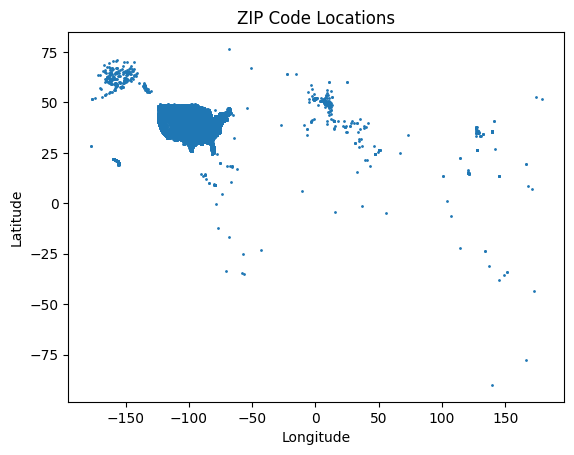

In [84]:
import matplotlib.pyplot as plt
plt.plot(zip_latlon_df['longitude'], zip_latlon_df['latitude'], 'o', markersize=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ZIP Code Locations')
plt.show()

In [103]:
avo_health_centers_df

,name,phone,state,county,address,zip code,website,Contact Email,Description & Services offered. [Please use detailed Keywords]
0,Lake Superior Community Health Center White Pi...,218-722-1497,MN,,"210 3rd St, Carlton, MN",55718,,,
1,Marillac Clinic-OUTREACH DAY CENTER,970-200-1600,CO,,"302 Pitkin Ave, Grand Junction, CO",81501,,,
2,Family Health Center,718-933-2400,NY,,"1 Fordham Plz, Bronx, NY",10458,,,
3,Globe Clinic,833-431-4449,AZ,,"415 W Baseline Spur, Globe, AZ",85501,,,
4,Creswell Primary Care,252-209-0237,NC,,"9500 Nc Hwy 94 North, Creswell, NC",27928,,,
...,...,...,...,...,...,...,...,...,...
18449,Community Health Center of Cape Cod - Falmouth...,508-477-7090,MA,,"115 Scranton Avenue, Falmouth, MA",02540,,,
18450,"CARBON MEDICAL SERVICE ASSOCIATION, INC.",435-888-4411,UT,,"305 Center St, East Carbon, UT",84520,,,
18451,The Children's Clinic Family Health Center Wes...,844-822-4646,CA,,"2125 Santa Fe Ave, Long Beach, CA",90810,,,
18452,Lifespan Adamsville,731-925-2300,TN,,"726 E Main St, Adamsville, TN",38310,,,
